In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,classification_report
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/Finance.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [6]:

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Missing value Imputation

<Axes: xlabel='Gender', ylabel='count'>

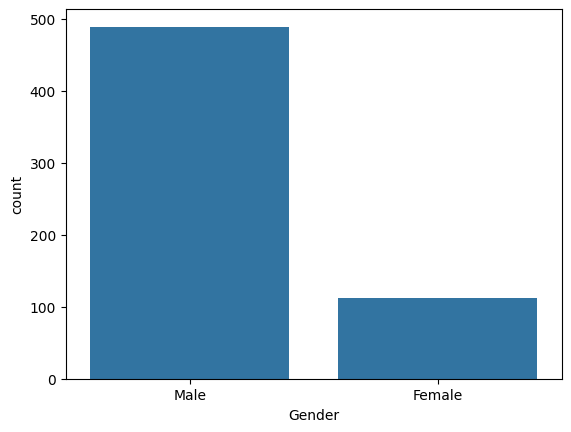

In [7]:
sns.countplot(x=df['Gender'])

In [8]:
df['Gender'].mode()

,Gender
0,Male


In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# 2.Married column missing value Imputation

<Axes: xlabel='Married', ylabel='count'>

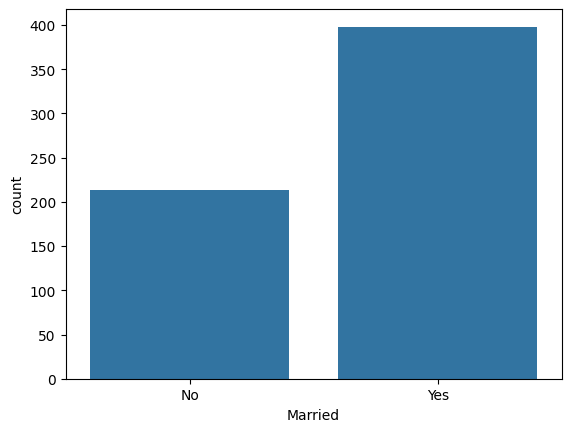

In [10]:
sns.countplot(x=df['Married'])

In [11]:
df['Married'].mode()

,Married
0,Yes


In [12]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

# 3. Handling Missing value for Dependent Column

<Axes: xlabel='Dependents', ylabel='count'>

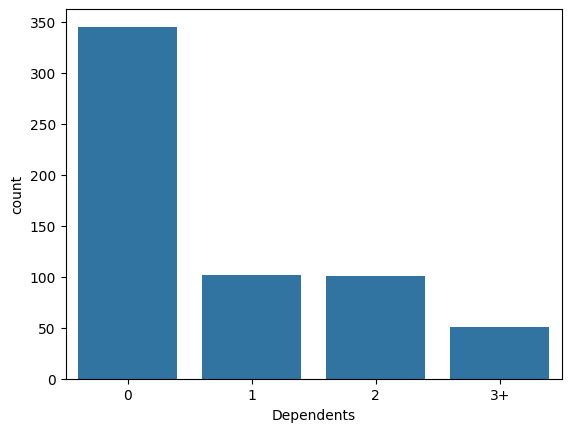

In [13]:
sns.countplot(x=df['Dependents'])

In [14]:
df['Dependents'].mode()

,Dependents
0,0


In [15]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

# Self_Employed Missing value Imputation

<Axes: xlabel='Self_Employed', ylabel='count'>

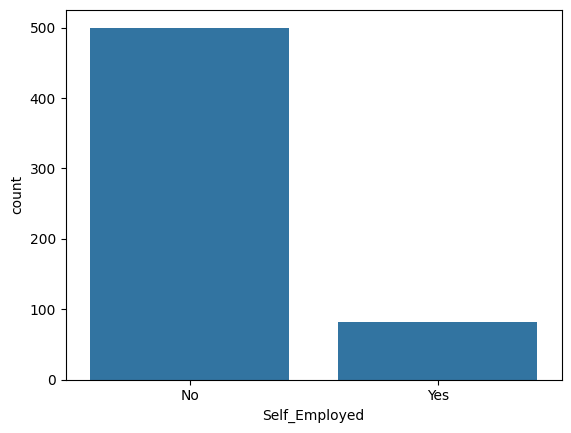

In [16]:
sns.countplot(x=df['Self_Employed'])

In [17]:
df['Self_Employed'].mode()

,Self_Employed
0,No


In [18]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [19]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# LOAN AMOUNT missing value imputation

In [20]:
df['LoanAmount'].median()

128.0

In [21]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

# Loan_Amount_Term Missing value Imputation

In [22]:
df['Loan_Amount_Term'].median()

360.0

In [23]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# CREDIT HISTORY missing value Imputation

<Axes: xlabel='Credit_History', ylabel='count'>

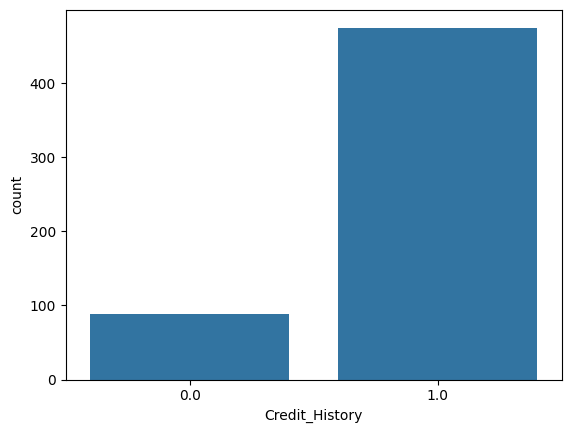

In [24]:
sns.countplot(x=df['Credit_History'])

In [25]:
df['Credit_History'].mode()[0]

1.0

In [26]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [27]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# Feature Creation

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
df.replace({
    'Loan_Status':{'N':0,'Y':1},
    'Gender':{'Male':1,'Female':0},
    'Married':{'No':0,'Yes':1},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Self_Employed':{'No':0,'Yes':1}
},inplace=True)

In [30]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


# Train-Test Split

In [32]:
def train_test_split_features(df):
  y = df['Loan_Status']
  x= df.drop(['Loan_Status','Loan_ID'],axis=1)
  x= pd.get_dummies(data=x,columns=['Property_Area','Dependents'])
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
  print(x.head())
  print(x.columns)
  features = list(x.columns)
  return x_train,x_test,y_train,y_test,features

In [33]:
x_train,x_test,y_train,y_test,features = train_test_split_features(df)

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        0          1              0             5849   
1       1        1          1              0             4583   
2       1        1          1              1             3000   
3       1        1          0              0             2583   
4       1        0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                False                    False                 True   
1                 True                    Fa

# FIT and EVALUATE

In [34]:
def fit_and_evaluate(x_train,x_test,y_train,y_test):
  random_forest = RandomForestClassifier(random_state=0,\
                                         max_depth=5,\
                                         min_samples_split=0.01,\
                                         max_features=0.8,
                                         max_samples=0.8)
  model = random_forest.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  return model

In [35]:
model = fit_and_evaluate(x_train,x_test,y_train,y_test)

[[14 19]
 [ 3 87]]
              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



In [36]:
important = pd.DataFrame(model.feature_importances_)
important['features'] = features
important.columns = ['importance','feature']
important.sort_values('importance',ascending=False,inplace=True)

# Feature Importance

<BarContainer object of 16 artists>

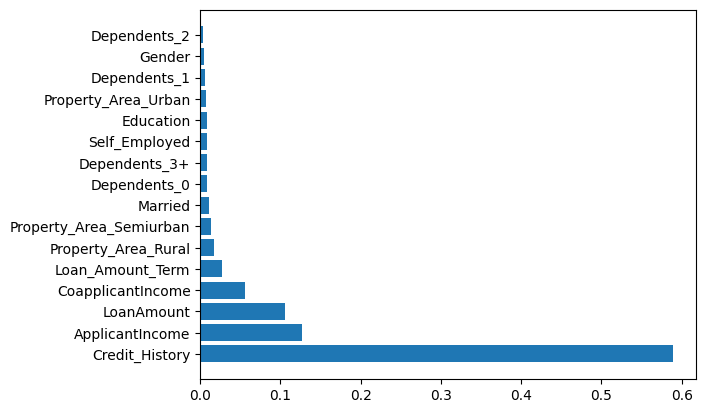

In [37]:
import matplotlib.pyplot as plt
plt.barh(important.feature,important.importance)

In [38]:
rf_prob = model.predict_proba(x_test)
rf_predict = model.predict(x_test)
print(rf_prob[0:10])
print(rf_predict)

[[0.19272078 0.80727922]
 [0.14771754 0.85228246]
 [0.38062446 0.61937554]
 [0.18603742 0.81396258]
 [0.08543933 0.91456067]
 [0.75808333 0.24191667]
 [0.22398913 0.77601087]
 [0.32271272 0.67728728]
 [0.88275661 0.11724339]
 [0.12886089 0.87113911]]
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
